In [1]:
# remove the notebook root logger.\n",
import logging
logger = logging.getLogger()
logger.handlers = []

%matplotlib inline

In [2]:
import pandas as pd


csvfile_link = "https://raw.githubusercontent.com/antoinecarme/TimeSeriesData/master/ozone-la.csv"
ozone_dataframe = pd.read_csv(csvfile_link);
import datetime
ozone_dataframe['Month'] = ozone_dataframe['Month'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m"))
ozone_dataframe.head()

,Month,Ozone
0,1955-01-01,2.7
1,1955-02-01,2.0
2,1955-03-01,3.6
3,1955-04-01,5.0
4,1955-05-01,6.5


In [3]:
def create_model(iActivateCrossVal , iFolds):
    import pyaf.ForecastEngine as autof
    lEngine = autof.cForecastEngine()
    if(iActivateCrossVal):
        lEngine.mOptions.mCrossValidationOptions.mMethod = "TSCV";
        lEngine.mOptions.mCrossValidationOptions.mNbFolds = iFolds
    lEngine.train(ozone_dataframe[:-12] , 'Month' , 'Ozone', 12);
    lEngine.getModelInfo();
    return lEngine

In [4]:
model_no_cross_valid = create_model(False , None)
model_with_cross_valid_5 = create_model(True , 5)
model_with_cross_valid_10 = create_model(True , 10)


INFO:pyaf.std:TRAINING_ENGINE_START {'Signals': ['Ozone'], 'Horizons': {'Ozone': 12}}
INFO:pyaf.std:TRAINING_ENGINE_END 4.958
INFO:pyaf.std:TIME_DETAIL TimeVariable='Month' TimeMin=1955-01-01T00:00:00.000000 TimeMax=1967-09-01T00:00:00.000000 TimeDelta=<DateOffset: months=1> Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Ozone' Length=204  Min=1.2 Max=8.7  Mean=3.835784 StdDev=1.491559
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Ozone' Min=0.0 Max=1.0  Mean=0.351438 StdDev=0.198875
INFO:pyaf.std:DECOMPOSITION_TYPE 'T+S+R'
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Ozone_LinearTrend_residue_Cycle_12_residue_NoAR' [LinearTrend + Cycle_12 + NoAR]
INFO:pyaf.std:TREND_DETAIL '_Ozone_LinearTrend' [LinearTrend]
INFO:pyaf.std:CYCLE_DETAIL '_Ozone_LinearTrend_residue_Cycle_12' [Cycle_12]
INFO:pyaf.std:AUTOREG_DETAIL '_Ozone_LinearTrend_residue_Cycle_12_residue_NoAR' [NoAR]
INFO:pyaf.std:MODEL_PERFS Fit STEP=1 {'MAPE': 0.1

INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='CumSum_Ozone' Min=0.2 Max=71.693333  Mean=41.48183 StdDev=20.294103
INFO:pyaf.std:DECOMPOSITION_TYPE 'T+S+R'
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE 'CumSum_'
INFO:pyaf.std:BEST_DECOMPOSITION  'CumSum_Ozone_Lag1Trend_residue_Cycle_12_residue_NoAR' [Lag1Trend + Cycle_12 + NoAR]
INFO:pyaf.std:TREND_DETAIL 'CumSum_Ozone_Lag1Trend' [Lag1Trend]
INFO:pyaf.std:CYCLE_DETAIL 'CumSum_Ozone_Lag1Trend_residue_Cycle_12' [Cycle_12]
INFO:pyaf.std:AUTOREG_DETAIL 'CumSum_Ozone_Lag1Trend_residue_Cycle_12_residue_NoAR' [NoAR]
INFO:pyaf.std:MODEL_PERFS Fit STEP=1 {'MAPE': 0.2069, 'RMSE': 1.0594, 'MAE': 0.7967, 'MASE': 0.9065}
INFO:pyaf.std:MODEL_PERFS Forecast STEP=1 {'MAPE': 0.2515, 'RMSE': 0.9165, 'MAE': 0.7628, 'MASE': 0.9826}
INFO:pyaf.std:MODEL_PERFS Test STEP=1 {'MAPE': 0.1962, 'RMSE': 0.5458, 'MAE': 0.4417, 'MASE': 0.9343}
INFO:pyaf.std:MODEL_PERFS Fit STEP=12 {'MAPE': 0.2633, 'RMSE': 1.3779, 'MAE': 1.0464, 'MASE': 1.1905}
INFO:pyaf

In [5]:
model_no_cross_valid_forecast = model_no_cross_valid.forecast(ozone_dataframe, 12);
model_with_cross_valid_10_forecast = model_with_cross_valid_10.forecast(ozone_dataframe, 12);
model_with_cross_valid_5_forecast = model_with_cross_valid_5.forecast(ozone_dataframe, 12);


INFO:pyaf.std:FORECASTING_ENGINE_START {'Signals': ['Ozone'], 'Horizons': {'Ozone': 12}}
INFO:pyaf.std:FORECASTING_ENGINE_END 0.195
INFO:pyaf.std:FORECASTING_ENGINE_START {'Signals': ['Ozone'], 'Horizons': {'Ozone': 12}}
INFO:pyaf.std:FORECASTING_ENGINE_END 0.176
INFO:pyaf.std:FORECASTING_ENGINE_START {'Signals': ['Ozone'], 'Horizons': {'Ozone': 12}}
INFO:pyaf.std:FORECASTING_ENGINE_END 0.176


<AxesSubplot: xlabel='Month'>

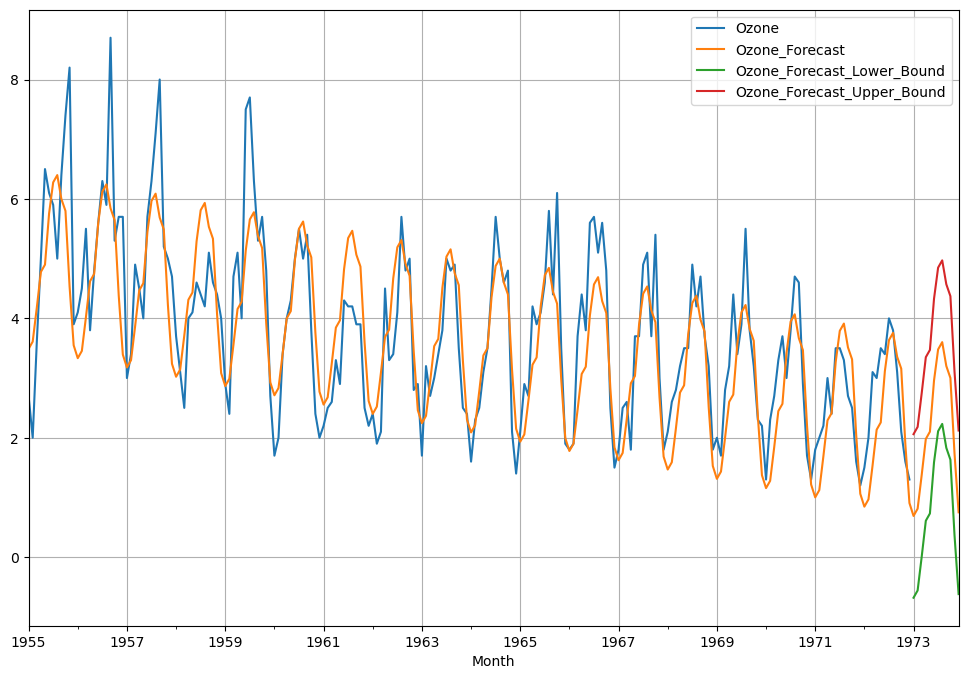

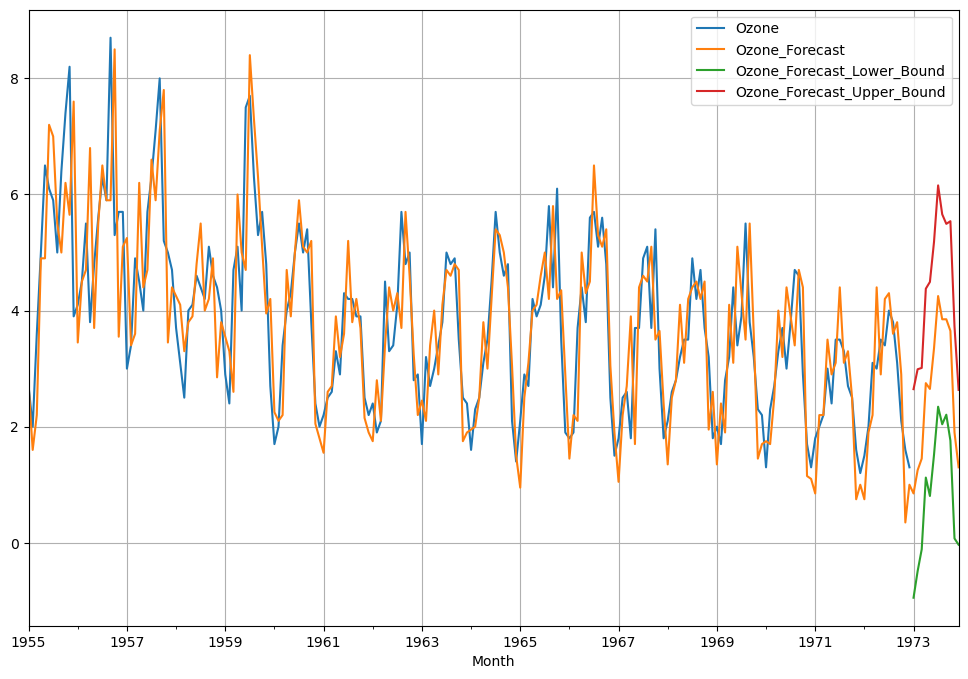

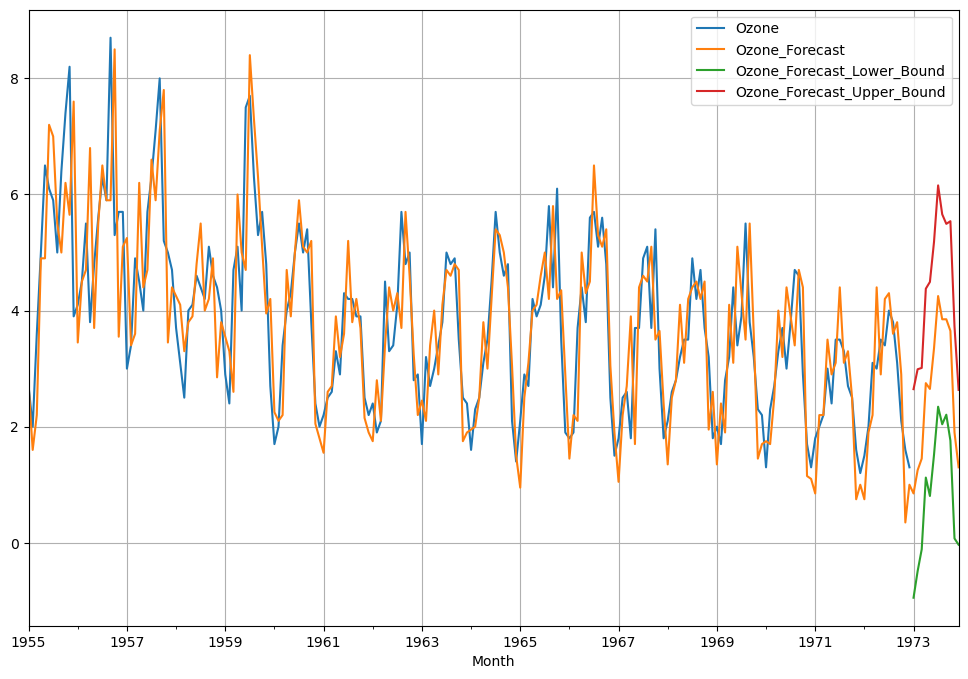

In [6]:
model_no_cross_valid_forecast.plot.line('Month', ['Ozone' , 'Ozone_Forecast', 
                                             'Ozone_Forecast_Lower_Bound', 
                                             'Ozone_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
model_with_cross_valid_10_forecast.plot.line('Month', ['Ozone' , 'Ozone_Forecast', 
                                             'Ozone_Forecast_Lower_Bound', 
                                             'Ozone_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
model_with_cross_valid_5_forecast.plot.line('Month', ['Ozone' , 'Ozone_Forecast', 
                                             'Ozone_Forecast_Lower_Bound', 
                                             'Ozone_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
